In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

current_directory = os.getcwd()
save_dir = "pictures"
os.makedirs(save_dir, exist_ok=True)  




AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('off')  # Hide axes for cleaner display
  plt.show()


In [3]:
from PIL import Image
dataset_path = current_directory + "/assets/fsl_test" 
image_dir = os.path.join(dataset_path, "images")
label_dir = os.path.join(dataset_path, "labels")

In [4]:
X = []
y_class = []
y_bbox = []
class_ids = set()

In [5]:
SIZE = 224
image_size = (SIZE, SIZE)

In [6]:
for filename in os.listdir(image_dir):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        image_path = os.path.join(image_dir, filename)
        label_path = os.path.join(label_dir, os.path.splitext(filename)[0] + ".txt")

        if not os.path.exists(label_path):
            continue

        # Load image
        img = cv2.imread(image_path)
        if img is None:
            continue
       
     
        img = cv2.resize(img, image_size)
        img = img / 255.0


        # Load annotation
        with open(label_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls = int(parts[0])
            bbox = list(map(float, parts[1:]))

            X.append(img)
            y_class.append(cls)
            y_bbox.append(bbox)
            class_ids.add(cls)

X = np.array(X, dtype=np.float32)


In [7]:
print(class_ids)

{0, 1}


In [8]:
print(len(X)) 

41


In [9]:

# Map class IDs to indices
class_ids = sorted(list(class_ids))
class_to_idx = {cls: idx for idx, cls in enumerate(class_ids)}
num_classes = len(class_ids)

# # One-hot encode class labels
y_class = [class_to_idx[c] for c in y_class]
y_class = to_categorical(y_class, num_classes=num_classes)

y_bbox = np.array(y_bbox, dtype=np.float32)

In [10]:
print(X)
print("------------------------------------------------")
print(y_class)
print("------------------------------------------------")
print(y_bbox)


     

[[[[0.6509804  0.6509804  0.6039216 ]
   [0.64705884 0.64705884 0.6       ]
   [0.64705884 0.64705884 0.6       ]
   ...
   [0.6392157  0.6431373  0.60784316]
   [0.64705884 0.6509804  0.6156863 ]
   [0.63529414 0.6431373  0.6156863 ]]

  [[0.67058825 0.67058825 0.61960787]
   [0.6666667  0.6666667  0.61960787]
   [0.6627451  0.6627451  0.6117647 ]
   ...
   [0.64705884 0.6509804  0.6156863 ]
   [0.654902   0.654902   0.61960787]
   [0.64705884 0.6509804  0.627451  ]]

  [[0.69803923 0.69803923 0.6431373 ]
   [0.69411767 0.69411767 0.6392157 ]
   [0.6901961  0.6901961  0.63529414]
   ...
   [0.65882355 0.6627451  0.627451  ]
   [0.65882355 0.6627451  0.627451  ]
   [0.64705884 0.654902   0.6313726 ]]

  ...

  [[0.32941177 0.34117648 0.49803922]
   [0.29803923 0.3137255  0.4509804 ]
   [0.2784314  0.29803923 0.40784314]
   ...
   [0.83137256 0.77254903 0.7372549 ]
   [0.7058824  0.6509804  0.6117647 ]
   [0.4862745  0.43529412 0.39607844]]

  [[0.49411765 0.5294118  0.63529414]
   [0.4

In [11]:
X_train, X_test, y_cls_train, y_cls_test, y_bbox_train, y_bbox_test = train_test_split(X, y_class, y_bbox, test_size=0.2, random_state=42)


     

In [12]:
print(X_train.shape)
print(X_test.shape)


(32, 224, 224, 3)
(9, 224, 224, 3)


In [13]:
input_layer = layers.Input(shape=(SIZE, SIZE, 3))

x = layers.Conv2D(32, (3,3), activation='relu')(input_layer)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

# Output 1: class probabilities
class_output = layers.Dense(num_classes, activation='softmax', name='class_output')(x)

# Output 2: bounding box (x_center, y_center, width, height)
bbox_output = layers.Dense(4, activation='sigmoid', name='bbox_output')(x)

model = models.Model(inputs=input_layer, outputs=[class_output, bbox_output])
model.compile(
    optimizer='adam',
    loss={'class_output': 'categorical_crossentropy', 'bbox_output': 'mse'},
    metrics={'class_output': 'accuracy'}
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 54, 54,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 186624)    │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │ 23,888,000 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_output        │ (None, 2)         │        258 │ dense[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bbox_output (Dense) │ (None, 4)         │        516 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,908,166 (91.20 MB)

 Trainable params: 23,908,166 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train,
    {'class_output': y_cls_train, 'bbox_output': y_bbox_train},
    epochs=15,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - bbox_output_loss: 0.0432 - class_output_accuracy: 0.4286 - class_output_loss: 0.7273 - loss: 0.7704 - val_bbox_output_loss: 0.1715 - val_class_output_accuracy: 0.5000 - val_class_output_loss: 40.7794 - val_loss: 40.9510
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 64s 64s/step - bbox_output_loss: 0.1843 - class_output_accuracy: 0.5714 - class_output_loss: 31.6958 - loss: 31.8801 - val_bbox_output_loss: 0.1518 - val_class_output_accuracy: 0.5000 - val_class_output_loss: 9.8097 - val_loss: 9.9615
Epoch 3/15


In [ ]:

model.evaluate(X_test, {'class_output': y_cls_test, 'bbox_output': y_bbox_test})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - bbox_output_loss: 0.0293 - class_output_accuracy: 1.0000 - class_output_loss: 0.0510 - loss: 0.0803


[0.08029165863990784, 0.05096546560525894, 0.029326193034648895, 1.0]

In [ ]:

# Predict on the test set
y_pred = model.predict(X_test)

print(y_pred[0])  # Class probabilities
# Separate class and bounding box predictions
y_cls_pred = y_pred[0]  # The class prediction (probabilities)
y_bbox_pred = y_pred[1]  # The bounding box prediction (x_center, y_center, width, height)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[0.7067875  0.29321247]
 [0.00613002 0.9938699 ]
 [0.00545163 0.9945484 ]
 [0.99370724 0.00629284]
 [0.02524536 0.9747547 ]
 [0.9663344  0.03366561]
 [0.00948192 0.99051815]
 [0.01257417 0.9874258 ]
 [0.01167145 0.9883286 ]]


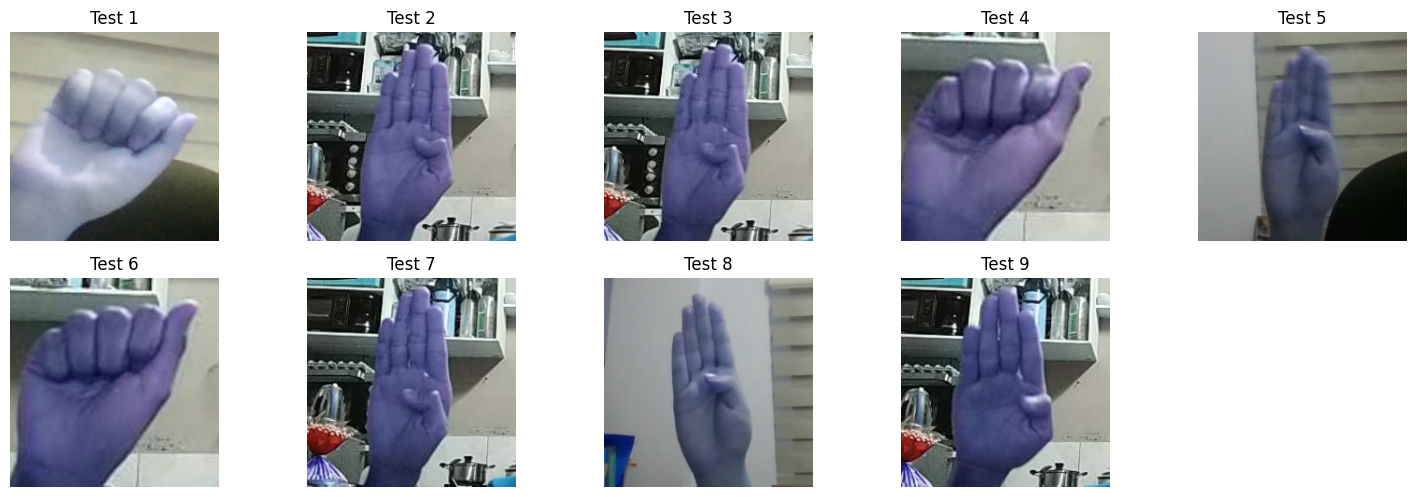

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of test images
num_images = len(X_test)

# Choose grid size (e.g., 4 rows, 5 columns)
rows = 4
cols = 5

# Adjust the figure size as needed
plt.figure(figsize=(15, 10))

for i in range(rows * cols):
    if i >= num_images:
        break  # Don't go out of bounds

    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_test[i])
    plt.axis("off")
    plt.title(f"Test {i + 1}")

plt.tight_layout()
plt.show()

In [ ]:
print(X_test.shape)

(9, 224, 224, 3)


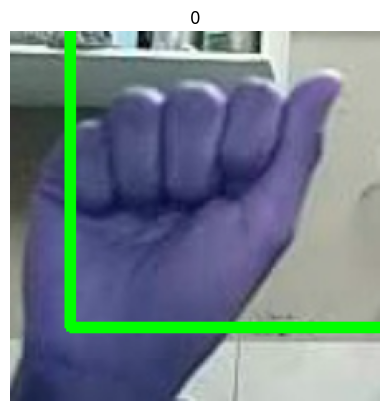

In [ ]:
index = 5
img = X_test[5]

# Rescale the bounding box predictions (back to original size)
img_height, img_width, _ = img.shape
predicted_bbox = y_bbox_pred[index]

# Convert normalized bbox to pixel coordinates (0 to img_width / img_height)
x_center = predicted_bbox[0] * img_width
y_center = predicted_bbox[1] * img_height
width = predicted_bbox[2] * img_width
height = predicted_bbox[3] * img_height

# Get the top-left and bottom-right corners of the bounding box
x1 = int(x_center - width / 2)
y1 = int(y_center - height / 2)
x2 = int(x_center + width / 2)
y2 = int(y_center + height / 2)

# Show the predicted class
predicted_class = np.argmax(y_cls_pred, axis=1)
predicted_class_name = class_ids[predicted_class[index]]

img = cv2.resize(img, image_size)
img_display = (img * 255).astype(np.uint8).copy()

color = (0, 255, 0)  # Green box
thickness = 5

# Draw rectangle
cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

# Choose font
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1

# Get text size to draw background
(text_width, text_height), _ = cv2.getTextSize(str(predicted_class_name), font, font_scale, font_thickness)

# Draw filled rectangle behind text
cv2.rectangle(img_display, (x1, y1 - text_height - 4), (x1 + text_width, y1), color, -1)

# Draw text (white text on top of the box)
cv2.putText(img_display, str(predicted_class_name), (x1, y1 - 2), font, font_scale, (255, 255, 255), font_thickness, cv2.LINE_AA)

plt.imshow(img_display)
plt.axis("off")
plt.title(predicted_class_name)
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define your model input size
SIZE = 224  # Example input size, replace with your actual model size
image_size = (SIZE, SIZE)
class_ids = ['open hand', 'fist', 'peace']  # Example class names

# Open webcam
cap = cv2.VideoCapture(0)
print("Press ESC to exit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to read from webcam.")
        break

    original_img = frame.copy()

    # Preprocess for model
    resized_img = cv2.resize(frame, image_size)
    normalized_img = resized_img / 255.0
    input_img = np.expand_dims(normalized_img, axis=0)

    # Predict
    y_cls_pred, y_bbox_pred = model.predict(input_img, verbose=0)

    # Bounding box rescale
    img_height, img_width, _ = original_img.shape
    predicted_bbox = y_bbox_pred[0]

    x_center = predicted_bbox[0] * img_width
    y_center = predicted_bbox[1] * img_height
    width = predicted_bbox[2] * img_width
    height = predicted_bbox[3] * img_height

    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Class prediction
    predicted_class = np.argmax(y_cls_pred[0])
    predicted_class_name = class_ids[predicted_class]

    # Draw box and label
    cv2.rectangle(original_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.rectangle(original_img, (x1, y1 - 20), (x1 + 100, y1), (0, 255, 0), -1)
    cv2.putText(original_img, predicted_class_name, (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)

    # Show live prediction
    cv2.imshow("Real-Time Prediction", original_img)

    key = cv2.waitKey(1) & 0xFF
    if key == "q":  # ESC
        break

cap.release()
cv2.destroyAllWindows()

Press ESC to exit.


In [ ]:
import cv2
import numpy as np

# Define your model input size
SIZE = 224  # Set this to match your model
image_size = (SIZE, SIZE)
class_ids = ['A', 'B']  # Replace with your actual classes

# Load image from file
image_path = current_directory + "/pictures/hands.jpg"  # Change to your image path
original_img = cv2.imread(image_path)
if original_img is None:
    raise FileNotFoundError(current_directory + "/pictures/tite.jpg")

# Preprocess for model
resized_img = cv2.resize(original_img, image_size)
normalized_img = resized_img / 255.0
input_img = np.expand_dims(normalized_img, axis=0)

# Predict
y_cls_pred, y_bbox_pred = model.predict(input_img, verbose=0)

# Bounding box rescale
img_height, img_width, _ = original_img.shape
predicted_bbox = y_bbox_pred[0]

x_center = predicted_bbox[0] * img_width
y_center = predicted_bbox[1] * img_height
width = predicted_bbox[2] * img_width
height = predicted_bbox[3] * img_height

x1 = int(x_center - width / 2)
y1 = int(y_center - height / 2)
x2 = int(x_center + width / 2)
y2 = int(y_center + height / 2)

# Class prediction
predicted_class = np.argmax(y_cls_pred[0])
predicted_class_name = class_ids[predicted_class]

# Draw box and label
cv2.rectangle(original_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2.rectangle(original_img, (x1, y1 - 20), (x1 + 100, y1), (0, 255, 0), -1)
cv2.putText(original_img, predicted_class_name, (x1, y1 - 5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)

# Show or save result
cv2.imshow("Prediction", original_img)
cv2.waitKey(0)
cv2.destroyAllWindows()